In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'C:\Users\Hp\Desktop\ml labs\last labs\lab 13\check points\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'C:\Users\Hp\Desktop\ml labs\last labs\lab 11\computer vision\train'
validation_dir = r'C:\Users\Hp\Desktop\ml labs\last labs\lab 11\computer vision\validation'
test_dir = r'C:\Users\Hp\Desktop\ml labs\last labs\lab 11\computer vision\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [8]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [10]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [11]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 8,
                         callbacks = callbacks)

Epoch 1/8
50/50 [==============================] - ETA: 0s - loss: 0.8695 - acc: 0.6225
Epoch 1: val_loss improved from inf to 0.67996, saving model to C:\Users\Hp\Desktop\ml labs\last labs\lab 13\check points\E1-cp-0001-loss0.68.h5
50/50 [==============================] - 348s 7s/step - loss: 0.8695 - acc: 0.6225 - val_loss: 0.6800 - val_acc: 0.6607
Epoch 2/8
50/50 [==============================] - ETA: 0s - loss: 0.5021 - acc: 0.7750
Epoch 2: val_loss improved from 0.67996 to 0.58690, saving model to C:\Users\Hp\Desktop\ml labs\last labs\lab 13\check points\E1-cp-0002-loss0.59.h5
50/50 [==============================] - 400s 8s/step - loss: 0.5021 - acc: 0.7750 - val_loss: 0.5869 - val_acc: 0.6741
Epoch 3/8
50/50 [==============================] - ETA: 0s - loss: 0.4113 - acc: 0.8156
Epoch 3: val_loss improved from 0.58690 to 0.36615, saving model to C:\Users\Hp\Desktop\ml labs\last labs\lab 13\check points\E1-cp-0003-loss0.37.h5
50/50 [==============================] - 391s 8s/step

In [12]:
model_history.history

{'loss': [0.869495153427124,
  0.5021429657936096,
  0.4113231599330902,
  0.3515753149986267,
  0.33447209000587463,
  0.2834571599960327,
  0.25657975673675537,
  0.22253842651844025],
 'acc': [0.6225000023841858,
  0.7749999761581421,
  0.815625011920929,
  0.8399999737739563,
  0.8443750143051147,
  0.8737499713897705,
  0.8887500166893005,
  0.9024999737739563],
 'val_loss': [0.6799639463424683,
  0.5869012475013733,
  0.3661532402038574,
  0.3721029758453369,
  0.30092430114746094,
  0.2882845997810364,
  0.3040725290775299,
  0.26131102442741394],
 'val_acc': [0.6607142686843872,
  0.6741071343421936,
  0.8080357313156128,
  0.8080357313156128,
  0.8616071343421936,
  0.8526785969734192,
  0.8616071343421936,
  0.8660714030265808]}

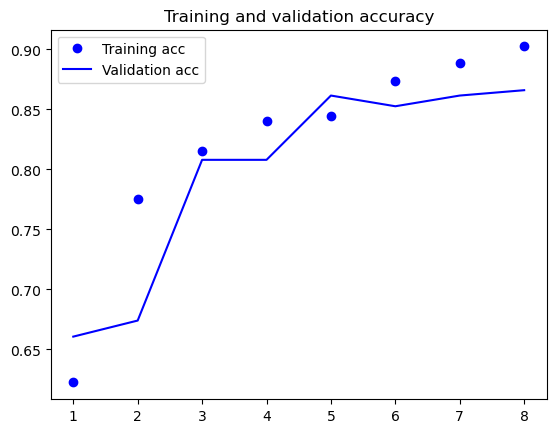

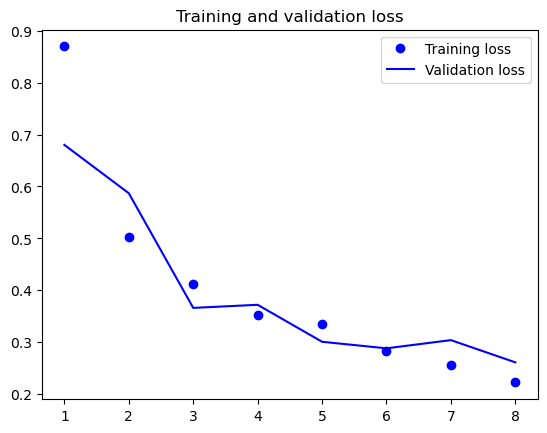

<Figure size 640x480 with 0 Axes>

In [13]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\Hp\Desktop\ml labs\last labs\lab 13\model_Accuracy.png')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 12s 2s/step


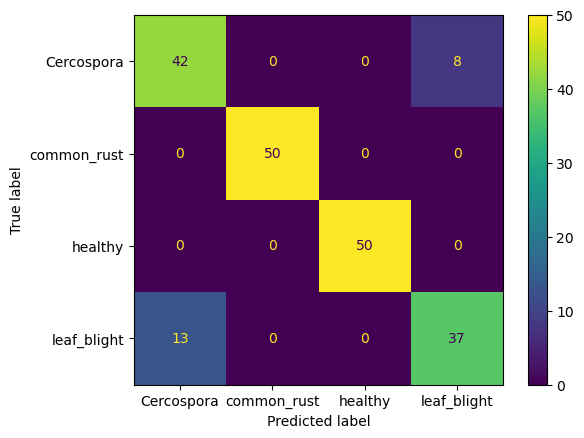

In [15]:
model = load_model(r'C:\Users\Hp\Desktop\ml labs\last labs\lab 13\check points\E1-cp-0008-loss0.26.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [16]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.76      0.84      0.80        50
 common_rust       1.00      1.00      1.00        50
     healthy       1.00      1.00      1.00        50
 leaf_blight       0.82      0.74      0.78        50

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200

